# Repetitive Scenario Analysis

## 0 Setup

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Model
from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

## 1 Repeating Scenario

To find the appropriate number of scenario that sufficiently covers the uncertainty space

### Run simulation

In [8]:
2**15

32768

In [83]:
######## Problem Formulation
pf = 6
n_scenario = 2**12
n_policy = 1
sampling_technique = Samplers.SOBOL

######## Initialize Model
model, steps = get_model_for_problem_formulation(pf)
uncertainties = model.uncertainties
levers = model.levers

######## Reference Policy (No Levers)
ref_policy = [Policy('policy 1', **{'0_RfR 0':0,
                                    '1_RfR 0':0,
                                    '2_RfR 0':0,
                                    '3_RfR 0':0,
                                    '4_RfR 0':0,
                                    '0_RfR 1':0,
                                    '1_RfR 1':0,
                                    '2_RfR 1':0,
                                    '3_RfR 1':0,
                                    '4_RfR 1':0,
                                    'A.1_DikeIncrease 0':0,
                                    'A.2_DikeIncrease 0':0,
                                    'A.3_DikeIncrease 0':0,
                                    'A.4_DikeIncrease 0':0,
                                    'A.5_DikeIncrease 0':0,
                                    'A.1_DikeIncrease 1':0,
                                    'A.2_DikeIncrease 1':0,
                                    'A.3_DikeIncrease 1':0,
                                    'A.4_DikeIncrease 1':0,
                                    'A.5_DikeIncrease 1':0,
                                    'EWS_DaysToThreat':0})
                                ]

######## Run Model
# Run and save results for two different random seeds (suffix 1 and 2)
for suffix in [1, 2]:
    ema_logging.log_to_stderr(ema_logging.INFO)
    with MultiprocessingEvaluator(model, n_processes=6) as evaluator:
        results = evaluator.perform_experiments(scenarios=n_scenario, policies=ref_policy, uncertainty_sampling=sampling_technique)
    save_results(results, f'results/data/GSA_PF{pf}_S{n_scenario}_P{n_policy}_{sampling_technique.name}_{suffix}.tar.gz')

[MainProcess/INFO] pool started with 6 workers
[MainProcess/INFO] performing 155648 scenarios * 1 policies * 1 model(s) = 155648 experiments
100%|████████████████████████████████| 155648/155648 [1:00:13<00:00, 43.07it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S4096_P1_SOBOL_1.tar.gz
[MainProcess/INFO] pool started with 6 workers
[MainProcess/INFO] performing 155648 scenarios * 1 policies * 1 model(s) = 155648 experiments
100%|████████████████████████████████| 155648/155648 [1:09:33<00:00, 37.30it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S4096_P1_SOBOL_2.tar.gz


### Load run results that have different numbers of scenarios

In [85]:
# Load Results

# run 1
pf_1 = 6
n_scenario_1 = 2**12
n_policy_1 = 1
sampling_technique_1 = Samplers.SOBOL
suffix_1 = 1
results_1 = load_results(f'results/data/GSA_PF{pf_1}_S{n_scenario_1}_P{n_policy_1}_{sampling_technique_1.name}_{suffix_1}.tar.gz')

# run 2
pf_2= 6
n_scenario_2 = 2**10
n_policy_2 = 1
sampling_technique_2 = Samplers.SOBOL
suffix_2 = 1
results_2 = load_results(f'results/data/GSA_PF{pf_2}_S{n_scenario_2}_P{n_policy_2}_{sampling_technique_2.name}_{suffix_2}.tar.gz')

# run 3
pf_3 = 6
n_scenario_3 = 2**8
n_policy_3 = 1
sampling_technique_3 = Samplers.SOBOL
suffix_3 = 2
results_3 = load_results(f'results/data/GSA_PF{pf_3}_S{n_scenario_3}_P{n_policy_3}_{sampling_technique_3.name}_{suffix_3}.tar.gz')

# run 4
pf_4 = 6
n_scenario_4 = 2**5
n_policy_4 = 1
sampling_technique_4 = Samplers.SOBOL
suffix_4 = 2
results_4 = load_results(f'results/data/GSA_PF{pf_4}_S{n_scenario_4}_P{n_policy_4}_{sampling_technique_4.name}_{suffix_4}.tar.gz')

experiments_1, outcomes_1 = results_1
experiments_2, outcomes_2 = results_2
experiments_3, outcomes_3 = results_3
experiments_4, outcomes_4 = results_4

# print shape of experiments and outcomes
print(f'Experiments 1 shape: {experiments_1.shape}')
print(f'Experiments 2 shape: {experiments_2.shape}')
print(f'Experiments 3 shape: {experiments_3.shape}')
print(f'Experiments 4 shape: {experiments_4.shape}')

[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S4096_P1_SOBOL_1.tar.gz
[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S1024_P1_SOBOL_1.tar.gz
[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S256_P1_SOBOL_2.tar.gz
[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S32_P1_SOBOL_2.tar.gz


Experiments 1 shape: (155648, 42)
Experiments 2 shape: (38912, 42)
Experiments 3 shape: (9728, 42)
Experiments 4 shape: (1216, 42)


## 2 Compare data from two runs

### Compare distribution of key outcomes

* Plot Kernel Density Estimation (KDE) of important outcomes (e.g., Expected Annual Damage, Number of Deaths) for both runs.
* If the distributions overlap closely, the sample size is likely sufficient.

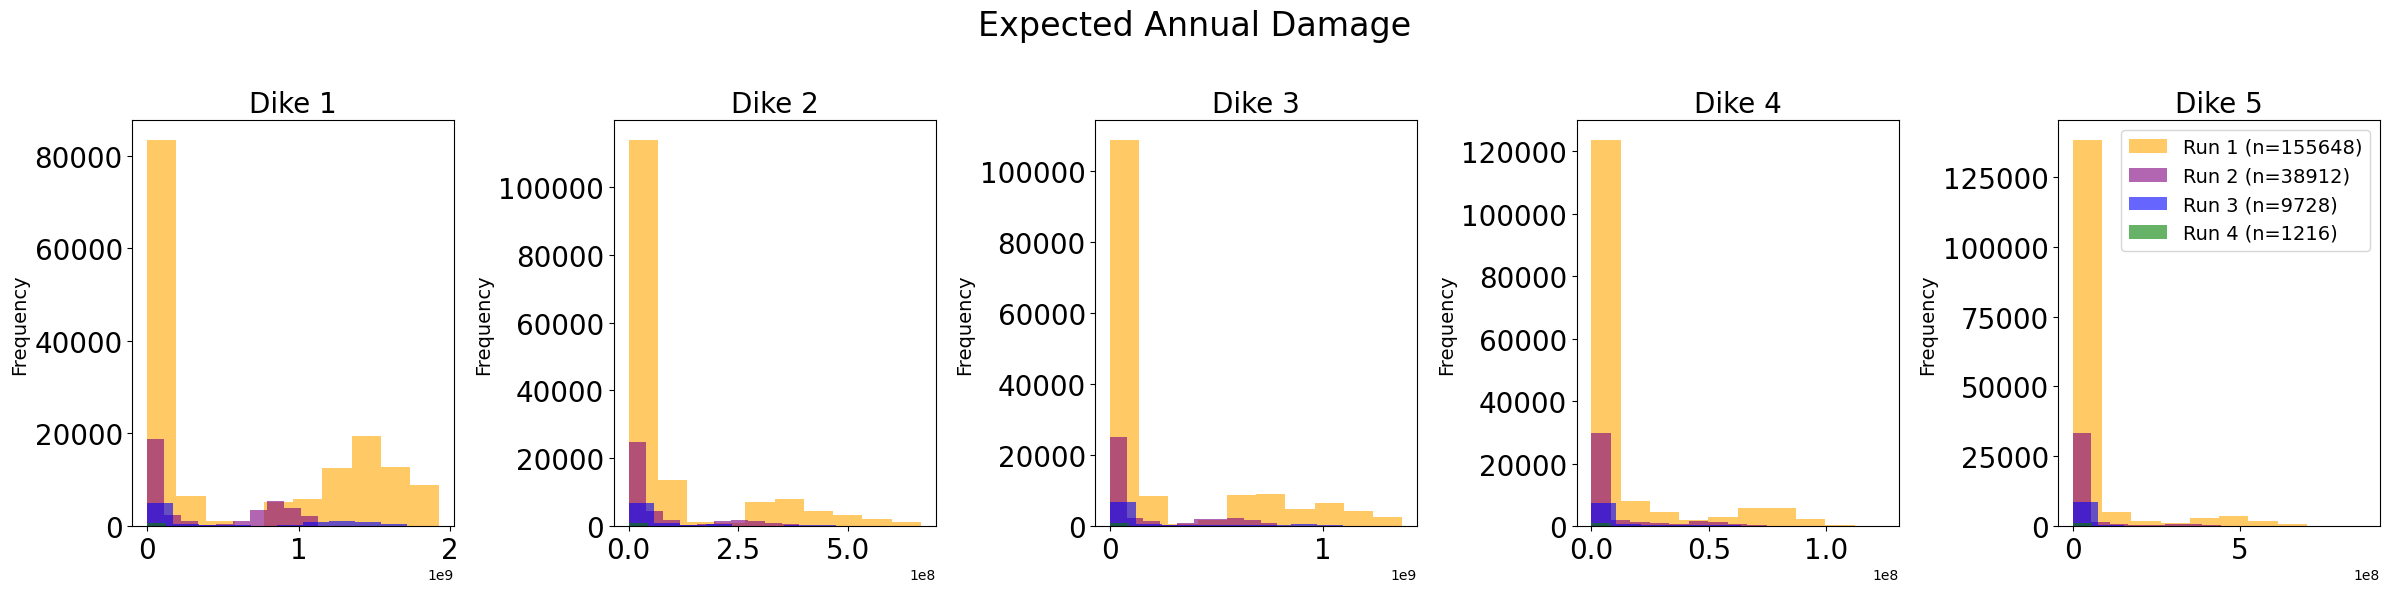

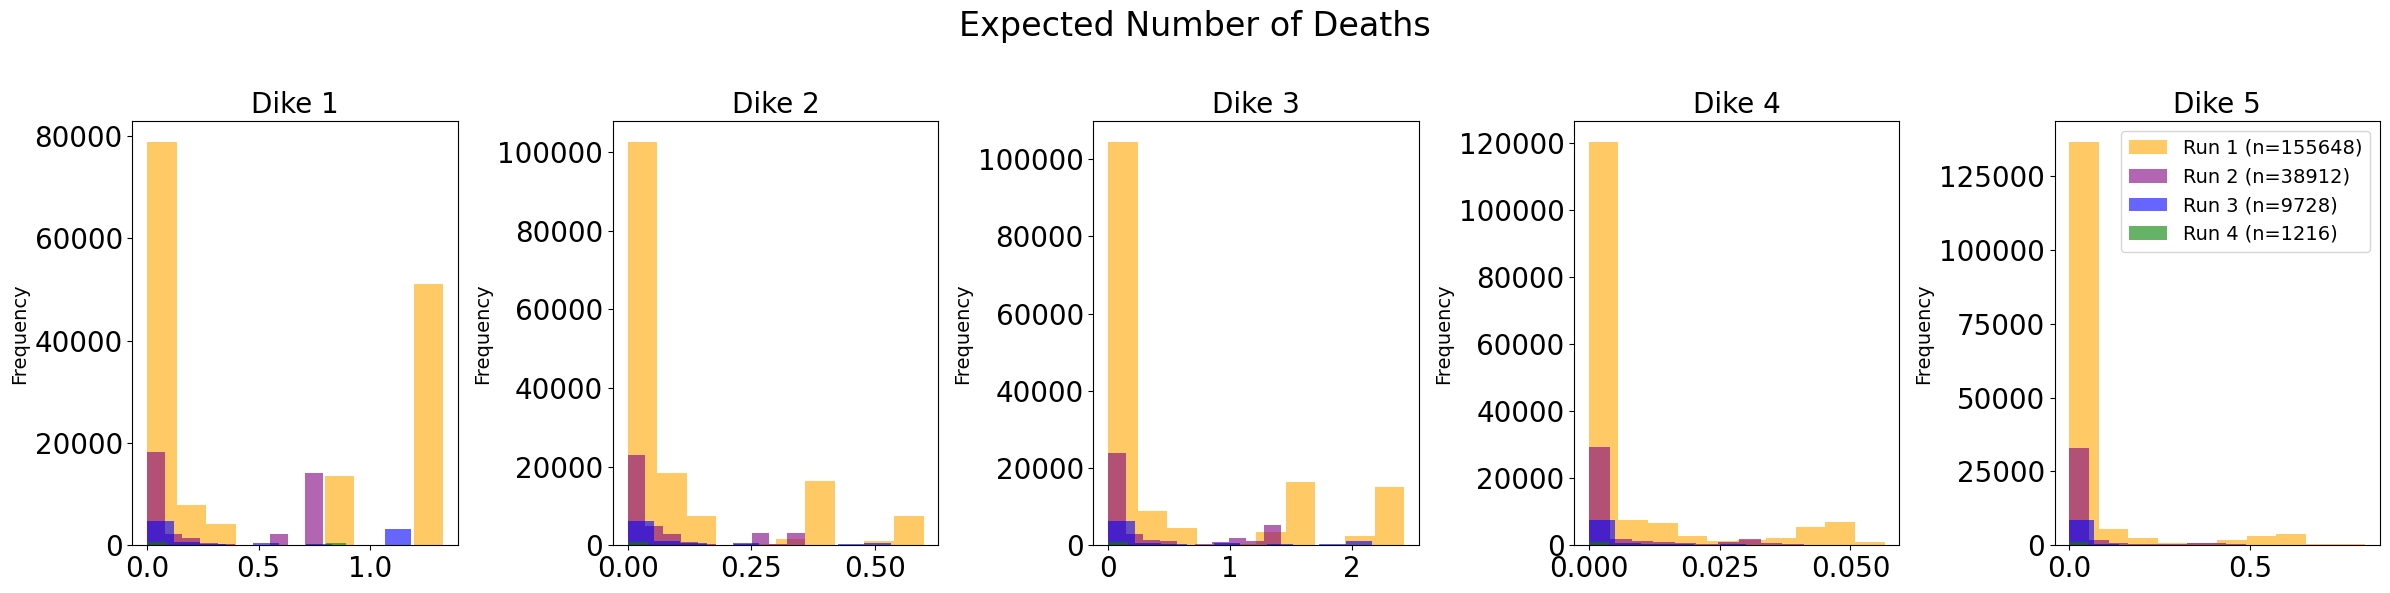

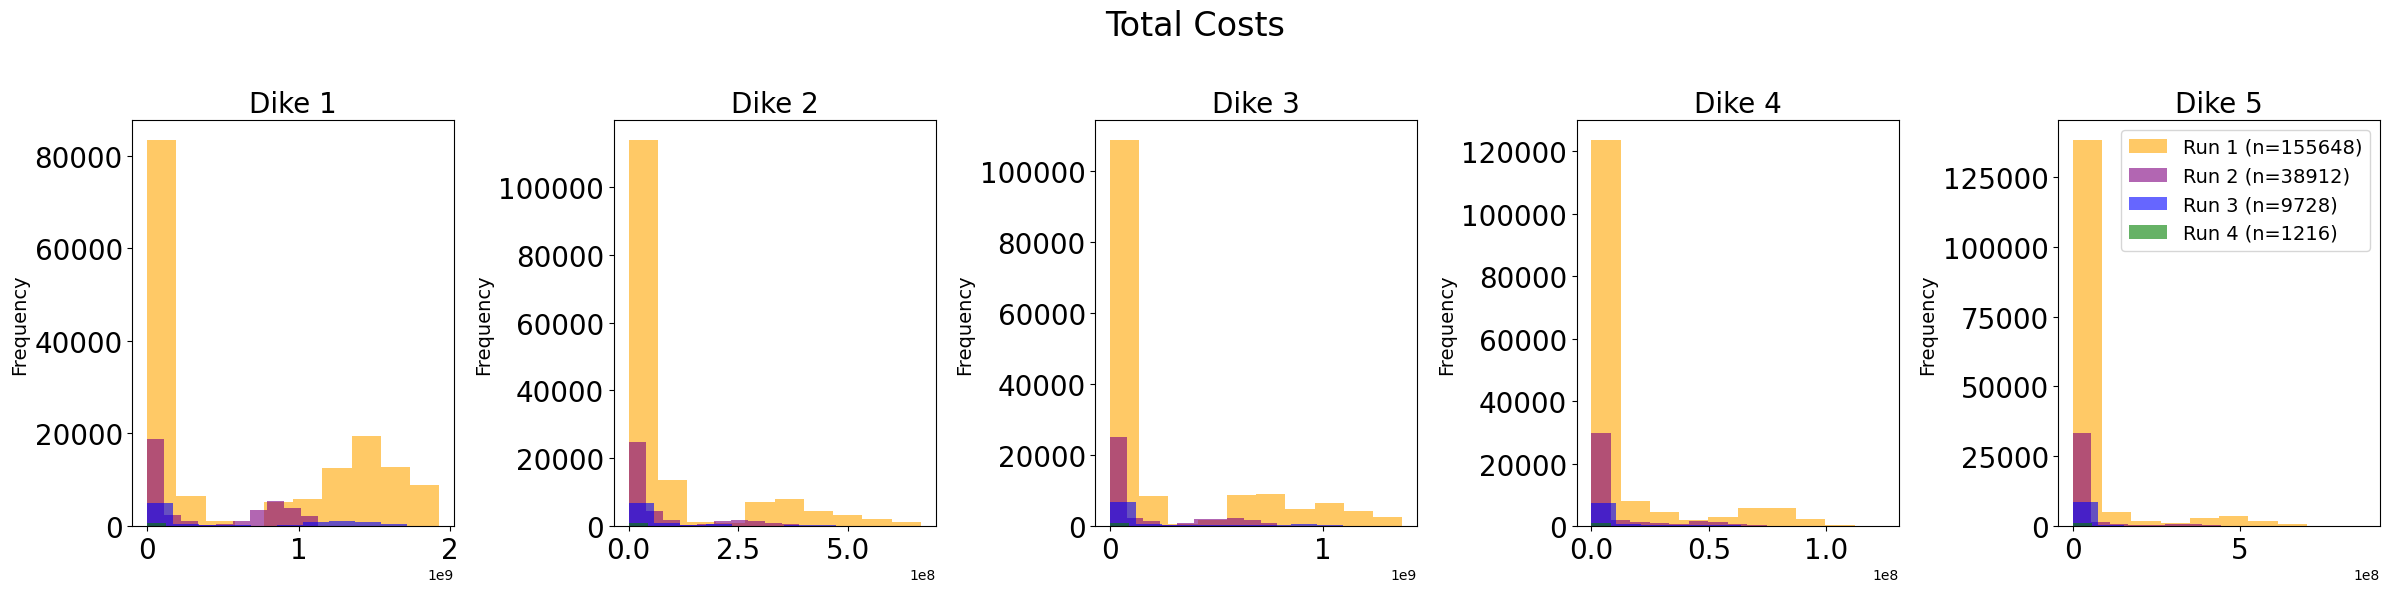

In [106]:
disaggregated_outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Total Costs"]

# Plot histograms for each disaggregated outcome for all dikes, comparing two runs
for outcome_name in disaggregated_outcome_names:
    fig, axes = plt.subplots(1, 5, figsize=(24, 6))
    for i, dike_no in enumerate(range(1, 6)):
        key = f"A.{dike_no}_{outcome_name}"
        axes[i].hist(outcomes_1[key], bins=10, color='orange', edgecolor='none', alpha=0.6, label=f'Run 1 (n={experiments_1.shape[0]})')
        axes[i].hist(outcomes_2[key], bins=10, color='purple', edgecolor='none', alpha=0.6, label=f'Run 2 (n={experiments_2.shape[0]})')
        axes[i].hist(outcomes_3[key], bins=10, color='blue', edgecolor='none', alpha=0.6, label=f'Run 3 (n={experiments_3.shape[0]})')
        axes[i].hist(outcomes_4[key], bins=10, color='green', edgecolor='none', alpha=0.6, label=f'Run 4 (n={experiments_4.shape[0]})')
        axes[i].set_title(f"Dike {dike_no}", fontsize=20)
        axes[i].set_ylabel("Frequency", fontsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=20)
        if i == 4:
            axes[i].legend(fontsize=14)
    fig.suptitle(f"{outcome_name}", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

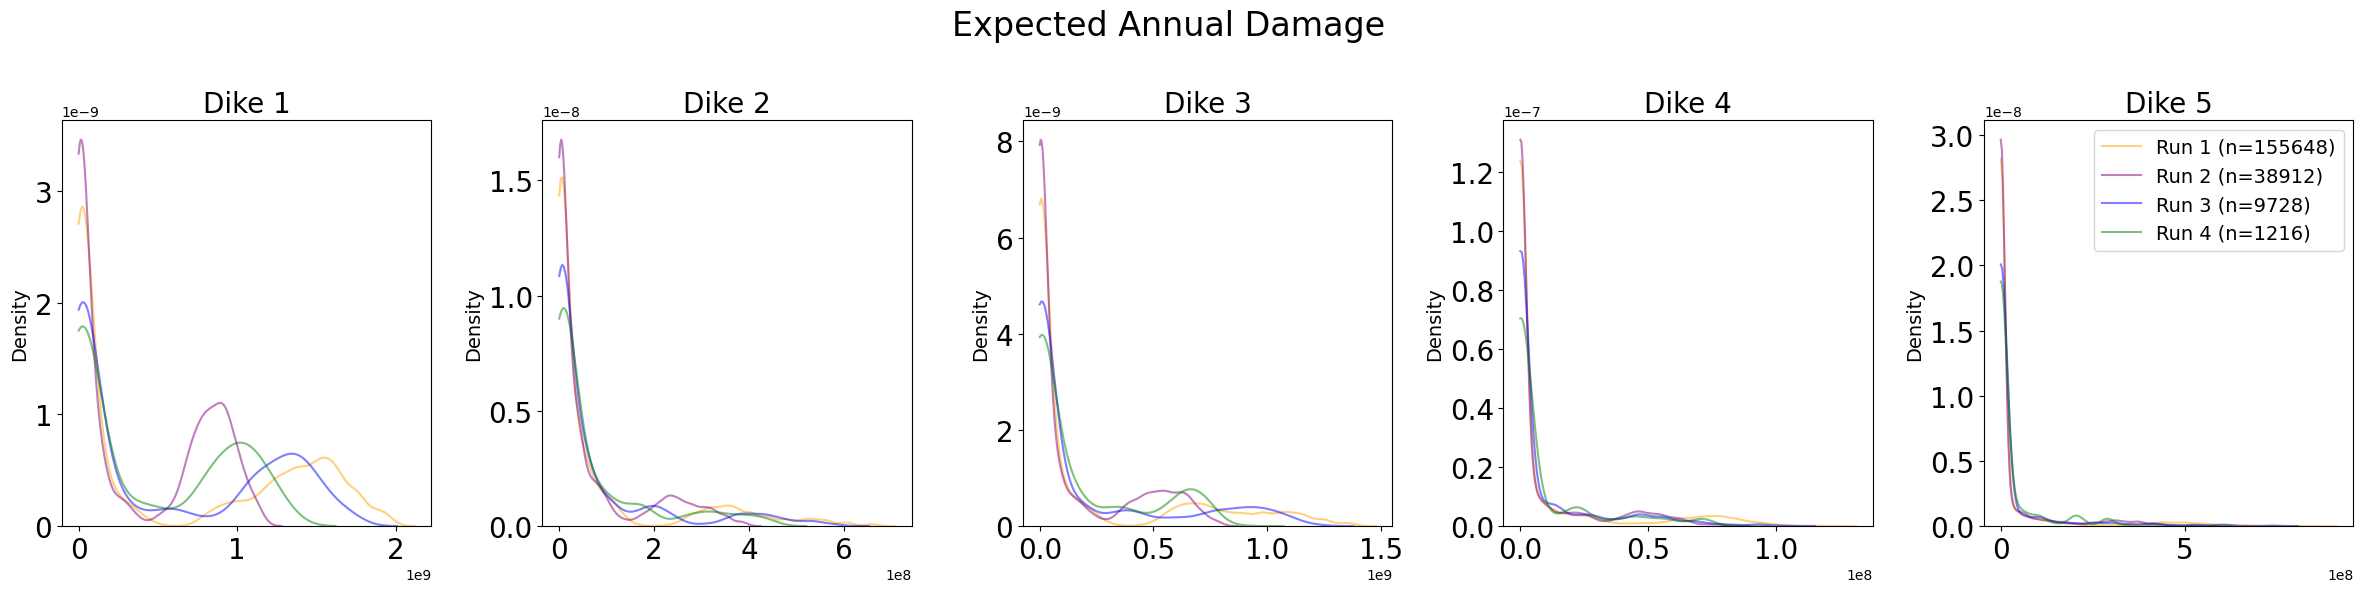

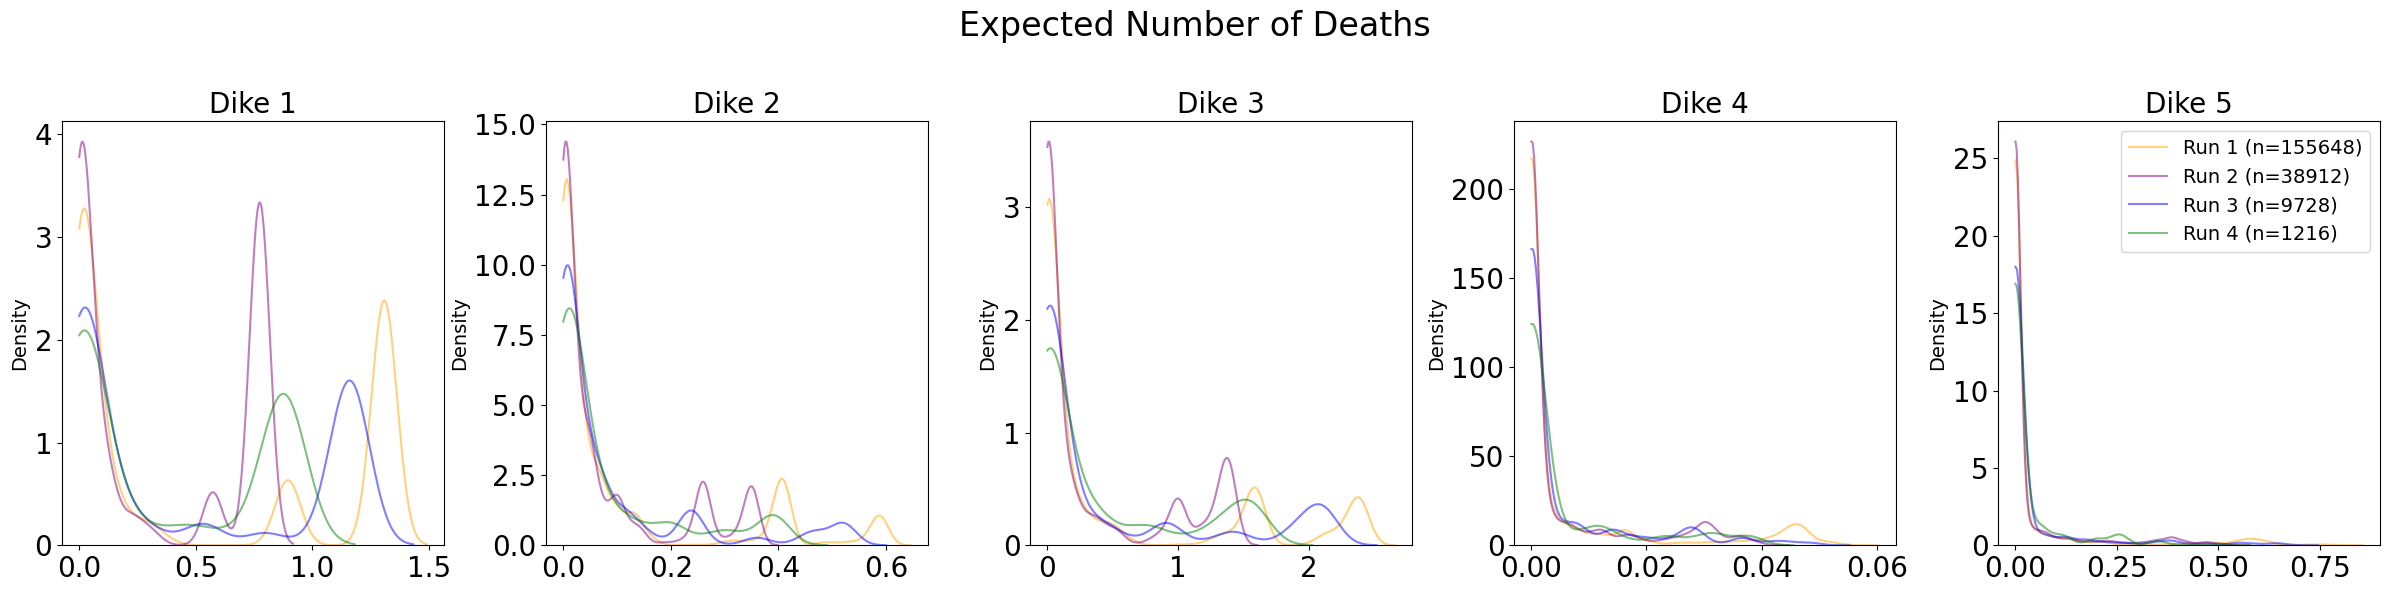

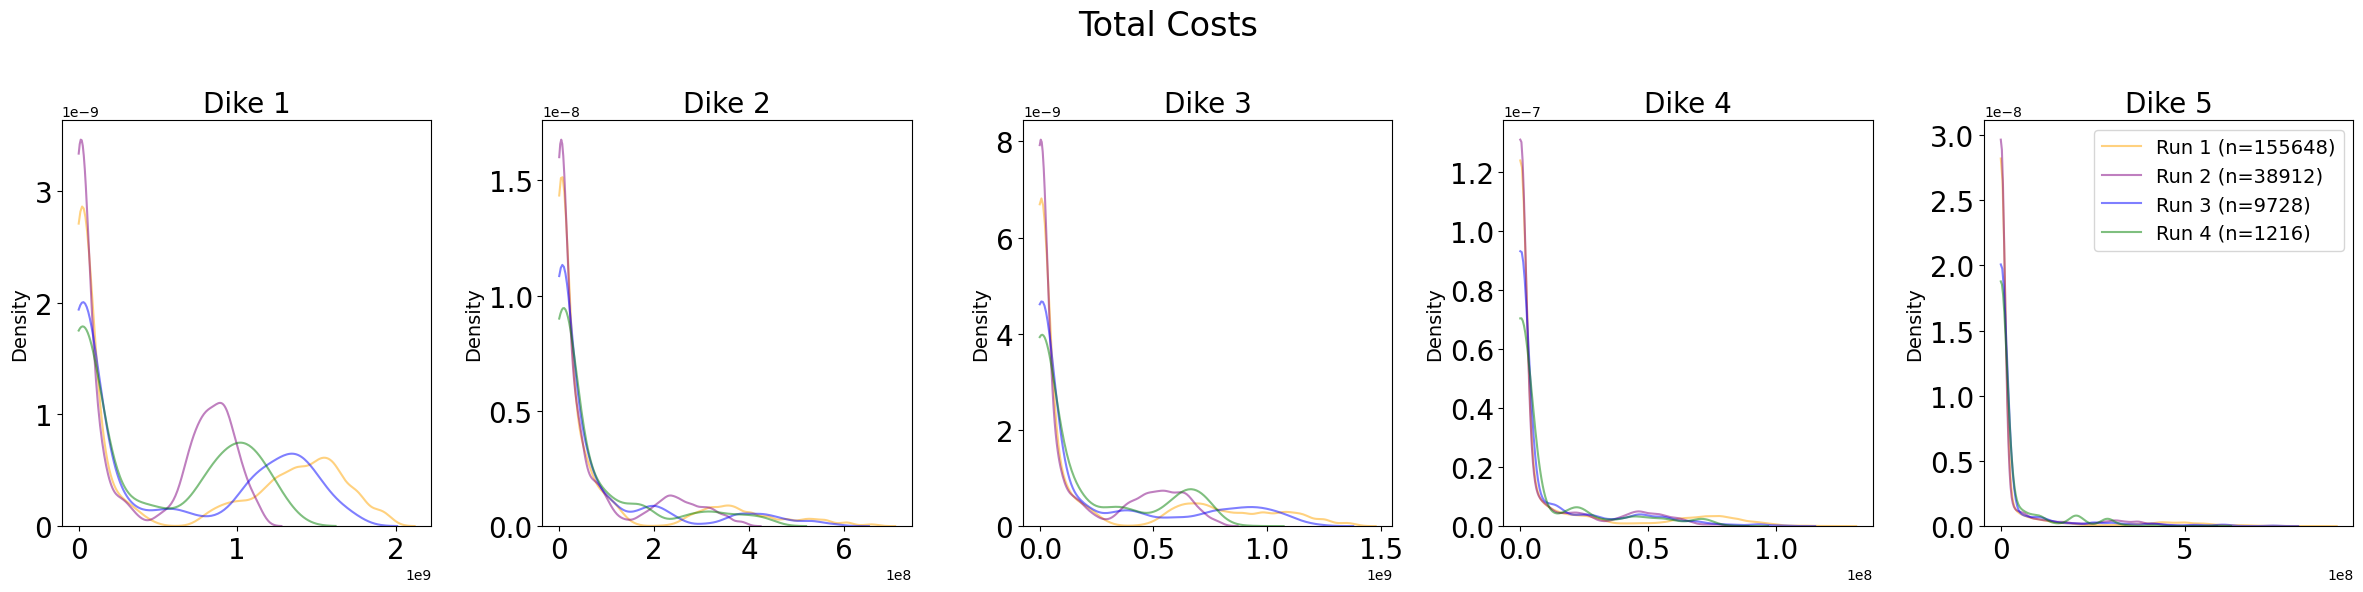

In [100]:
disaggregated_outcome_names = ["Expected Annual Damage", "Expected Number of Deaths", "Total Costs"]
# Plot KDEs for each disaggregated outcome for all dikes, comparing two runs
for outcome_name in disaggregated_outcome_names:
    fig, axes = plt.subplots(1, 5, figsize=(24, 6))
    for i, dike_no in enumerate(range(1, 6)):
        key = f"A.{dike_no}_{outcome_name}"
        sns.kdeplot(outcomes_1[key], ax=axes[i], color='orange', label=f'Run 1 (n={experiments_1.shape[0]})', fill=False, alpha=0.5, clip=(0, None))
        sns.kdeplot(outcomes_2[key], ax=axes[i], color='purple', label=f'Run 2 (n={experiments_2.shape[0]})', fill=False, alpha=0.5, clip=(0, None))
        sns.kdeplot(outcomes_3[key], ax=axes[i], color='blue', label=f'Run 3 (n={experiments_3.shape[0]})', fill=False, alpha=0.5, clip=(0, None))
        sns.kdeplot(outcomes_4[key], ax=axes[i], color='green', label=f'Run 4 (n={experiments_4.shape[0]})', fill=False, alpha=0.5, clip=(0, None))
        axes[i].set_title(f"Dike {dike_no}", fontsize=20)
        axes[i].set_ylabel("Density", fontsize=14)
        axes[i].tick_params(axis='both', which='major', labelsize=20)
        if i == 4:
            axes[i].legend(fontsize=14)
    fig.suptitle(f"{outcome_name}", fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Compare summary statistics

* Compute and compare means, medians, standard deviations, and percentiles (e.g., 5th, 50th, 95th) for each outcome.
* Small differences between runs indicate stability.

In [84]:
# Compare summary statistics for each outcome and dike (1-5)
summary_stats = []

for outcome_name in disaggregated_outcome_names:
    for dike_no in range(1, 6):
        key = f"A.{dike_no}_{outcome_name}"
        data1 = outcomes_1[key]
        data2 = outcomes_2[key]
        stats = {
            'Outcome': f"Dike {dike_no} - {outcome_name}",
            'Run 1 Mean': np.mean(data1),
            'Run 2 Mean': np.mean(data2),
            'Mean Diff %': 100 * (np.mean(data2) - np.mean(data1)) / np.mean(data1) if np.mean(data1) != 0 else np.nan,
            'Run 1 Median': np.median(data1),
            'Run 2 Median': np.median(data2),
            'Median Diff %': 100 * (np.median(data2) - np.median(data1)) / np.median(data1) if np.median(data1) != 0 else np.nan,
            'Run 1 Std': np.std(data1),
            'Run 2 Std': np.std(data2),
            'Std Diff %': 100 * (np.std(data2) - np.std(data1)) / np.std(data1) if np.std(data1) != 0 else np.nan,
            'Run 1 5th %ile': np.percentile(data1, 5),
            'Run 2 5th %ile': np.percentile(data2, 5),
            '5th %ile Diff %': 100 * (np.percentile(data2, 5) - np.percentile(data1, 5)) / np.percentile(data1, 5) if np.percentile(data1, 5) != 0 else np.nan,
            'Run 1 95th %ile': np.percentile(data1, 95),
            'Run 2 95th %ile': np.percentile(data2, 95),
            '95th %ile Diff %': 100 * (np.percentile(data2, 95) - np.percentile(data1, 95)) / np.percentile(data1, 95) if np.percentile(data1, 95) != 0 else np.nan,
        }
        summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
pd.set_option('display.float_format', '{:.3g}'.format)
display(summary_df)

,Outcome,Run 1 Mean,Run 2 Mean,Mean Diff %,Run 1 Median,Run 2 Median,Median Diff %,Run 1 Std,Run 2 Std,Std Diff %,Run 1 5th %ile,Run 2 5th %ile,5th %ile Diff %,Run 1 95th %ile,Run 2 95th %ile,95th %ile Diff %
0,Dike 1 - Expected Annual Damage,3.87e+08,5.48e+08,41.5,1.3e+08,1.46e+08,12.7,4.1e+08,6.14e+08,49.9,0,0,NaN,1.02e+09,1.55e+09,51.3
1,Dike 2 - Expected Annual Damage,6.5e+07,7.52e+07,15.6,1.58e+07,1.69e+07,7.48,9.91e+07,1.28e+08,29.2,0,0,NaN,2.98e+08,4.14e+08,39.2
2,Dike 3 - Expected Annual Damage,1.56e+08,2.09e+08,33.8,1.74e+07,1.61e+07,-7.63,2.32e+08,3.37e+08,45.2,0,0,NaN,6.47e+08,9.76e+08,50.9
3,Dike 4 - Expected Annual Damage,8.78e+06,9.55e+06,8.77,0,0,NaN,1.75e+07,1.95e+07,11.4,0,0,NaN,5.32e+07,5.83e+07,9.55
4,Dike 5 - Expected Annual Damage,3.3e+07,3.4e+07,3.15,0,0,NaN,8.9e+07,9.53e+07,7.08,0,0,NaN,2.88e+08,2.61e+08,-9.36
5,Dike 1 - Expected Number of Deaths,0.341,0.477,39.7,0.118,0.155,31.8,0.354,0.523,48.1,0,0,NaN,0.784,1.18,50
6,Dike 2 - Expected Number of Deaths,0.0759,0.0873,15,0.0199,0.0218,9.29,0.112,0.144,29,0,0,NaN,0.348,0.493,41.7
7,Dike 3 - Expected Number of Deaths,0.352,0.466,32.3,0.0411,0.0381,-7.09,0.515,0.737,43.1,0,0,NaN,1.39,2.11,52.3
8,Dike 4 - Expected Number of Deaths,0.00511,0.00538,5.32,0,0,NaN,0.0101,0.0107,6.52,0,0,NaN,0.0307,0.0306,-0.354
9,Dike 5 - Expected Number of Deaths,0.0378,0.0383,1.32,0,0,NaN,0.101,0.104,3.02,0,0,NaN,0.34,0.313,-7.85


### Kolmogorov-Smirnov (KS) Test

* Use the KS test to statistically compare the distributions of outcomes from both runs.
* A high p-value (e.g., >0.05) suggests the distributions are not significantly different.

In [59]:
from scipy.stats import ks_2samp

# Compare distributions using KS test for each outcome and dike
for outcome_name in disaggregated_outcome_names:
    print(f"--- {outcome_name} ---")
    for dike_no in range(1, 6):
        key = f"A.{dike_no}_{outcome_name}"
        ks_stat, p_value = ks_2samp(outcomes_1[key], outcomes_2[key])
        print(f"Dike {dike_no}: KS statistic = {ks_stat:.4f}, p-value = {p_value:.4g}")
    print()

--- Expected Annual Damage ---
Dike 1: KS statistic = 0.0938, p-value = 0.9993
Dike 2: KS statistic = 0.1875, p-value = 0.6351
Dike 3: KS statistic = 0.1562, p-value = 0.8378
Dike 4: KS statistic = 0.0938, p-value = 0.9993
Dike 5: KS statistic = 0.1562, p-value = 0.8378

--- Expected Number of Deaths ---
Dike 1: KS statistic = 0.0938, p-value = 0.9993
Dike 2: KS statistic = 0.1875, p-value = 0.6351
Dike 3: KS statistic = 0.1562, p-value = 0.8378
Dike 4: KS statistic = 0.0938, p-value = 0.9993
Dike 5: KS statistic = 0.1562, p-value = 0.8378

--- Total Costs ---
Dike 1: KS statistic = 0.0938, p-value = 0.9993
Dike 2: KS statistic = 0.1875, p-value = 0.6351
Dike 3: KS statistic = 0.1562, p-value = 0.8378
Dike 4: KS statistic = 0.0938, p-value = 0.9993
Dike 5: KS statistic = 0.1562, p-value = 0.8378

--- Dike Investment Costs ---
Dike 1: KS statistic = 0.0000, p-value = 1
Dike 2: KS statistic = 0.0000, p-value = 1
Dike 3: KS statistic = 0.0000, p-value = 1
Dike 4: KS statistic = 0.0000, p-

### Convergence Plots

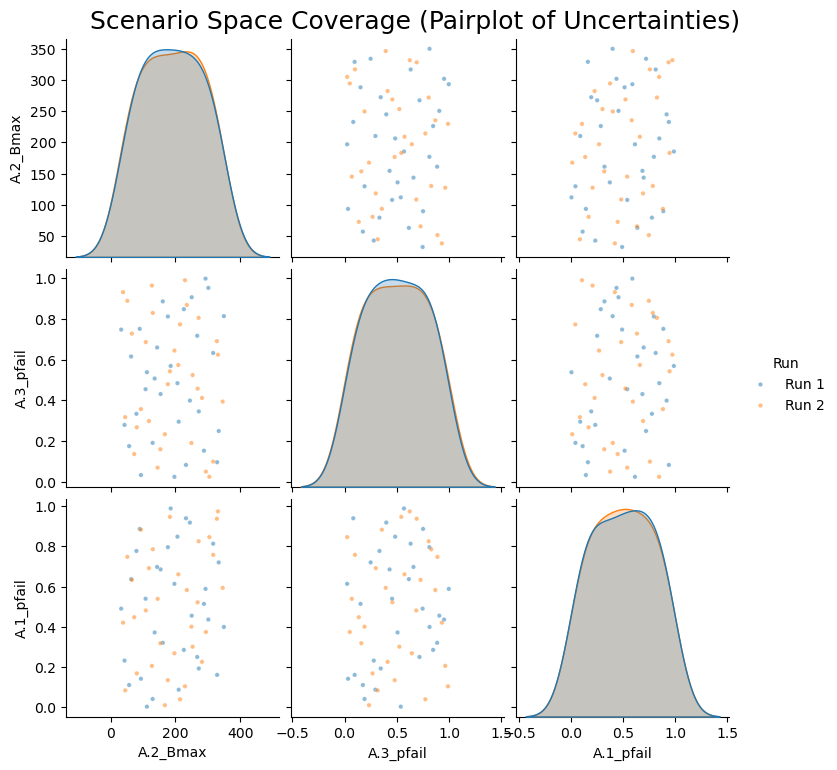

In [60]:
# Visualize scenario space coverage for both runs using pairplot (if uncertainties are not too many)
uncertainty_names = [u.name for u in uncertainties]
max_uncertainties_for_pairplot = 6  # Limit for reasonable pairplot visualization

# Randomly select 6 uncertainties for visualization
np.random.seed(0)
selected_uncertainties = np.random.choice(uncertainty_names, size=6, replace=False).tolist()

if len(selected_uncertainties) <= max_uncertainties_for_pairplot:
    # Prepare dataframes for both runs
    df1 = results_1[0][selected_uncertainties].copy()
    df1['Run'] = 'Run 1'
    df2 = results_2[0][selected_uncertainties].copy()
    df2['Run'] = 'Run 2'
    combined_df = pd.concat([df1, df2], ignore_index=True)

    # Pairplot
    sns.pairplot(combined_df, hue='Run', plot_kws={'alpha': 0.5, 's': 10})
    plt.suptitle("Scenario Space Coverage (Pairplot of Uncertainties)", y=1.02, fontsize=18)
    plt.show()
else:
    print(f"Too many uncertainties ({len(selected_uncertainties)}) for a pairplot. Consider plotting selected pairs or using dimensionality reduction.")

In [49]:
uncertainty_names

['discount rate 0',
 'discount rate 1',
 'A.0_ID flood wave shape',
 'A.1_Bmax',
 'A.1_pfail',
 'A.1_Brate',
 'A.2_Bmax',
 'A.2_pfail',
 'A.2_Brate',
 'A.3_Bmax',
 'A.3_pfail',
 'A.3_Brate',
 'A.4_Bmax',
 'A.4_pfail',
 'A.4_Brate',
 'A.5_Bmax',
 'A.5_pfail',
 'A.5_Brate']

## 3 Find worst-, medium-, best-case scenarios